# kickstarter project

Introduction:
* Why do some kickstarter campaigns succede whereas others don't? What factors play important roles in the funds that kickstarter campaigns raise? In this project, 30,000 kickstarter campaigns will be examined, to generate a better idea between the relationship of different parameters and the outcomes.

Source:
* The data was downloaded as a csv file from the kaggle dataset: "Kickstarter projects
More than 300,000 kickstarter projects". 
* Every campaign has a unique ID to it.
* Campaigns ended in as early as May 2009, and as late as March, 2013.
* The csv file contains 378,661 rows of data, with 292,627 campaigns in the U.S.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("raw_data.csv")
df = df.sort_values(by=["deadline"], ascending=True).reset_index(drop=True)
df = df.sample(1000)
del(df["usd pledged"], df["pledged"], df["goal"], df["currency"])
df = df[df["country"]=="US"]
df = df.rename(columns={"category":"sub_category", "usd_pledged_real":"pledged", "usd_goal_real":"goal", "deadline" : "end_date"})
df.fillna(value=0)
len(df)

786

In [4]:
df.columns

Index(['ID', 'name', 'sub_category', 'main_category', 'end_date', 'launched',
       'state', 'backers', 'country', 'pledged', 'goal'],
      dtype='object')

In [5]:
df["launch_date"] = pd.to_datetime(df['launched']).dt.date
df['launch_time'] = pd.to_datetime(df['launched']).dt.time
columns = ["ID", "name", "main_category", "sub_category", "launch_date", "end_date", "launch_time", "state", "backers", "country", "goal", "pledged"]
df = df[columns]
df

,ID,name,main_category,sub_category,launch_date,end_date,launch_time,state,backers,country,goal,pledged
37079,2055826726,"The ""Music Speaks"" project",Music,Pop,2011-12-06,2012-01-25,21:15:38,successful,68,US,5000.0,5192.99
330445,1338237611,The Lighthouse (Thriller Game),Games,Video Games,2017-01-03,2017-03-03,06:05:41,failed,215,US,25000.0,5285.00
162275,532942176,Back to the Future: Tucson's Drive-In Revival,Theater,Theater,2014-08-07,2014-09-08,21:46:17,failed,80,US,18000.0,2607.00
193617,1943263036,"Carving natural Ostrich, Rhea and Emu eggs wit...",Art,Art,2015-01-14,2015-02-13,03:20:16,failed,1,US,2500.0,25.00
71024,937320813,"""Raised in Brooklyn"", book needs editing and p...",Publishing,Fiction,2012-10-09,2012-11-08,20:55:19,failed,2,US,30000.0,30.00
276041,1671340610,Steampunk frederick,Theater,Festivals,2016-02-23,2016-03-14,04:43:59,successful,64,US,3000.0,3497.00
327964,1078966486,WOW Meatless Meatballs,Food,Food,2017-01-14,2017-02-15,07:38:58,failed,0,US,15000.0,0.00
339714,159602544,Jason Peters: Sky Diamond,Art,Installations,2017-04-21,2017-05-01,23:25:26,failed,0,US,2000.0,0.00
28624,958762886,the Vodnik film project,Film & Video,Film & Video,2011-09-05,2011-10-05,18:51:30,successful,54,US,6000.0,6210.00
135728,243380550,"6-song Blue-Eyed Soul EP titled, 'Sassy' by Ka...",Music,Pop,2014-04-01,2014-05-01,00:37:45,failed,72,US,10000.0,4825.00


In [6]:
df["country"].unique()

array(['US'], dtype=object)

In [7]:
df.count()

ID               786
name             786
main_category    786
sub_category     786
launch_date      786
end_date         786
launch_time      786
state            786
backers          786
country          786
goal             786
pledged          786
dtype: int64

In [8]:
df.dtypes

ID                 int64
name              object
main_category     object
sub_category      object
launch_date       object
end_date          object
launch_time       object
state             object
backers            int64
country           object
goal             float64
pledged          float64
dtype: object

In [9]:
df["pledged_to_goal"] = df["pledged"] / df["goal"] * 100
df.head()

,ID,name,main_category,sub_category,launch_date,end_date,launch_time,state,backers,country,goal,pledged,pledged_to_goal
37079,2055826726,"The ""Music Speaks"" project",Music,Pop,2011-12-06,2012-01-25,21:15:38,successful,68,US,5000.0,5192.99,103.859800
330445,1338237611,The Lighthouse (Thriller Game),Games,Video Games,2017-01-03,2017-03-03,06:05:41,failed,215,US,25000.0,5285.00,21.140000
162275,532942176,Back to the Future: Tucson's Drive-In Revival,Theater,Theater,2014-08-07,2014-09-08,21:46:17,failed,80,US,18000.0,2607.00,14.483333
193617,1943263036,"Carving natural Ostrich, Rhea and Emu eggs wit...",Art,Art,2015-01-14,2015-02-13,03:20:16,failed,1,US,2500.0,25.00,1.000000
71024,937320813,"""Raised in Brooklyn"", book needs editing and p...",Publishing,Fiction,2012-10-09,2012-11-08,20:55:19,failed,2,US,30000.0,30.00,0.100000


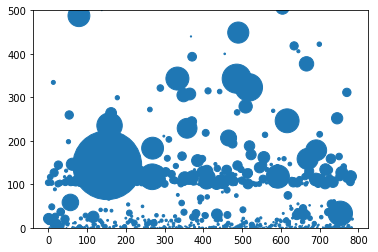

In [10]:
plt.scatter(x=range(len(df["pledged_to_goal"])), y=df["pledged_to_goal"], s=df["backers"]*0.5)
plt.ylim(0,500)
plt.show()

In [96]:
list(df)

['ID',
 'name',
 'main_category',
 'sub_category',
 'launch_date',
 'end_date',
 'launch_time',
 'state',
 'backers',
 'country',
 'goal',
 'pledged',
 'pledged_to_real']

In [97]:
numeric_columns = [
 'goal',
 'backers',
 'pledged',
 'goal']

for i in numeric_columns:
    print(i)
    print(df[i].corr(df["pledged_to_real"]))

goal
-0.04485164286996313
backers
0.5142044610847265
pledged
0.4336478584287044
goal
-0.04485164286996313


# One main category

In [98]:
df["main_category"].value_counts()

Film & Video    134
Music            97
Publishing       80
Games            78
Design           75
Technology       68
Food             44
Art              44
Fashion          37
Theater          25
Photography      23
Comics           22
Crafts           17
Dance            12
Journalism        9
Name: main_category, dtype: int64

In [99]:
film_video_df = df[df["main_category"]=="Film & Video"]
film_video_df.head()

,ID,name,main_category,sub_category,launch_date,end_date,launch_time,state,backers,country,goal,pledged,pledged_to_real
186677,931285092,Wheelchair Basketball Docu-series,Film & Video,Documentary,2014-12-08,2014-12-29,03:18:07,successful,85,US,10000.0,10182.00,101.820000
278346,1408878443,Transplanting: Season 2 - A Comedy Web Series ...,Film & Video,Webseries,2016-02-26,2016-03-27,17:00:24,successful,39,US,3300.0,4406.00,133.515152
68112,202232233,The Postponed Project,Film & Video,Webseries,2012-09-11,2012-10-11,13:57:45,canceled,65,US,7000.0,4350.54,62.150571
351786,1488338079,Bugman - The Movie,Film & Video,Family,2017-06-20,2017-07-20,20:02:36,failed,10,US,30000.0,995.00,3.316667
256753,1356616088,Too Cold to Swim - Feature Film Finishing Funds,Film & Video,Drama,2015-10-31,2015-11-21,17:08:15,successful,58,US,8000.0,8390.00,104.875000


In [100]:
len(film_video_df)

134

In [101]:
for i in numeric_columns:
    print(i)
    print(film_video_df[i].corr(film_video_df["pledged_to_real"]))

goal
-0.13692429675589296
backers
0.2643862718133235
pledged
0.39607764392674566
goal
-0.13692429675589296


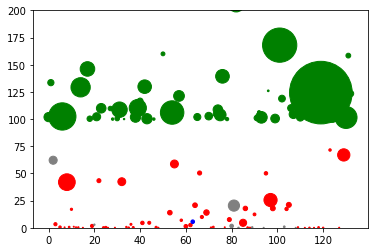

In [109]:
color_df = {"successful":"green", "failed":"red", "canceled":"grey", "live":"blue"}

plt.scatter(
    x=range(len(film_video_df["pledged_to_real"])),
    y=film_video_df["pledged_to_real"],
    s=film_video_df["backers"],
    c=film_video_df["state"].apply(lambda x: color_df[x])
)
plt.ylim(0, 200)
plt.show()

# Top performing main category

In [103]:
df["state"].value_counts()

failed        379
successful    266
canceled      111
live            5
suspended       4
Name: state, dtype: int64

In [104]:
group_df = df.groupby(["main_category", "state"])

In [105]:
category_count = group_df.count()
category_count

ID  name  sub_category  launch_date  end_date  \
main_category state                                                       
Art           canceled     8     8             8            8         8   
              failed      13    13            13           13        13   
              successful  23    23            23           23        23   
Comics        canceled     2     2             2            2         2   
              failed      10    10            10           10        10   
              successful  10    10            10           10        10   
Crafts        canceled     4     4             4            4         4   
              failed       8     8             8            8         8   
              live         1     1             1            1         1   
              successful   4     4             4            4         4   
Dance         canceled     1     1             1            1         1   
              failed       5     5             5            5         5   
              successful   5     5             5            5         5   
              suspended    1     1             1            1         1   
Design        canceled    14    14            14           14        14   
              failed      34    34            34           34        34   
              live         1     1             1            1         1   
              successful  25    25            25           25        25   
              suspended    1     1             1            1         1   
Fashion       canceled     3     3             3            3         3   
              failed      28    28            28           28        28   
              successful   6     6             6            6         6   
Film & Video  canceled    11    11            11           11        11   
              failed      66    66            66           66        66   
              live         1     1             1            1         1   
              successful  56    56            56           56        56   
Food          canceled     7     7             7            7         7   
              failed      27    27            27           27        27   
              successful  10    10            10           10        10   
Games         canceled    19    19            19           19        19   
              failed      33    33            33           33        33   
              live         1     1             1            1         1   
              successful  25    25            25           25        25   
Journalism    canceled     1     1             1            1         1   
              failed       6     6             6            6         6   
              successful   2     2             2            2         2   
Music         canceled    10    10            10           10        10   
              failed      36    36            36           36        36   
              successful  49    49            49           49        49   
              suspended    2     2             2            2         2   
Photography   canceled     2     2             2            2         2   
              failed      15    15            15           15        15   
              successful   6     6             6            6         6   
Publishing    canceled    13    13            13           13        13   
              failed      46    46            46           46        46   
              live         1     1             1            1         1   
              successful  20    20            20           20        20   
Technology    canceled    14    14            14           14        14   
              failed      43    43            43           43        43   
              successful  11    11            11           11        11   
Theater       canceled     2     2             2            2         2   
              failed       9     9             9   

In [106]:
category_df = group_df.mean()
category_df

ID     backers           goal  \
main_category state                                                 
Art           canceled    1.184810e+09    2.750000   26406.875000   
              failed      1.259874e+09    8.230769   17038.461538   
              successful  1.107799e+09   54.565217    2215.217391   
Comics        canceled    1.219816e+09   22.000000    7750.000000   
              failed      1.178682e+09   10.800000    9670.000000   
              successful  1.131385e+09   99.000000    2575.000000   
Crafts        canceled    2.368222e+08    7.000000    5437.500000   
              failed      1.226659e+09    8.750000   13205.625000   
              live        1.281232e+09   14.000000    3910.000000   
              successful  1.236279e+09   45.500000    2075.000000   
Dance         canceled    7.628039e+08    0.000000   95000.000000   
              failed      9.376412e+08    9.200000    4360.000000   
              successful  1.486219e+09   84.600000    5080.000000   
              suspended   1.727413e+09    0.000000      20.000000   
Design        canceled    8.656316e+08   33.714286   35378.571429   
              failed      1.198400e+09   18.382353   30159.705882   
              live        3.180563e+08   11.000000   20000.000000   
              successful  9.474065e+08  510.200000   20633.120000   
              suspended   3.896063e+08    6.000000   25000.000000   
Fashion       canceled    1.000873e+09    2.666667    8333.333333   
              failed      9.746474e+08    4.857143    7409.895357   
              successful  1.142571e+09   82.500000    6012.166667   
Film & Video  canceled    1.141491e+09   19.454545  320772.636364   
              failed      9.839747e+08   17.727273   38053.969697   
              live        2.654258e+08   13.000000   10000.000000   
              successful  1.061926e+09  195.142857   11815.410714   
Food          canceled    1.062212e+09    3.428571   15142.857143   
              failed      9.624963e+08   30.962963   20140.370370   
              successful  1.117968e+09  163.500000    9285.000000   
Games         canceled    1.097817e+09  100.842105   38931.578947   
              failed      1.066686e+09   26.696970   30351.515152   
              live        1.244013e+09    8.000000   10000.000000   
              successful  9.725373e+08  591.360000    7752.080000   
Journalism    canceled    7.783111e+08    0.000000   80000.000000   
              failed      1.242355e+09    0.500000   12891.666667   
              successful  1.499611e+09  457.500000   42250.000000   
Music         canceled    9.489103e+08    1.200000   21549.900000   
              failed      9.365008e+08    6.777778   11285.083333   
              successful  9.466915e+08  124.081633    7553.183673   
              suspended   1.405833e+09    0.000000   50000.500000   
Photography   canceled    7.770654e+08   13.000000    7505.000000   
              failed      1.113542e+09   18.933333   12245.600000   
              successful  9.245439e+08   99.166667    5469.833333   
Publishing    canceled    8.453765e+08    5.230769    8853.846154   
              failed      9.806517e+08    8.934783   17250.804348   
              live        2.344647e+07  123.000000    1000.000000   
              successful  1.211733e+09   79.450000    3918.550000   
Technology    canceled    1.285929e+09   30.214286   37635.000000   
              failed      1.017438e+09   40.046512   41522.697674   
              successful  1.125227e+09  233.636364   29449.909091   
Theater       canceled    1.562066e+09    7.000000    6300.000000   
              failed      1.293422e+09    9.555556    6088.888889   
              successful  1.314431e+09   78.500000    8719.571429   

                               pledged  pledged_to_real  
main_category state                                      
Art           canceled      202.625000         3.611677  
              failed        482.230769         5.435311  
        

(0, 300)

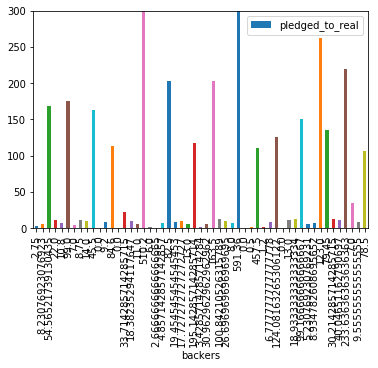

In [107]:
category_df.plot(kind="bar", x="backers", y="pledged_to_real")
plt.ylim(0,300)